<a href="https://colab.research.google.com/github/RosaCe21/Blanco-Moya-Rosa-Leonor-SIS420-AI/blob/main/01_reg_lin_sim_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de programación Regresión Lineal

In [19]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = np.loadtxt('/content/drive/MyDrive/datasets/mydatasetsia/LAB-01.csv', delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # m = numero de ejemplos de entrenamiento

In [22]:
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [23]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [24]:
print(X.size)

30


### 1.1 Trazar los datos

In [25]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


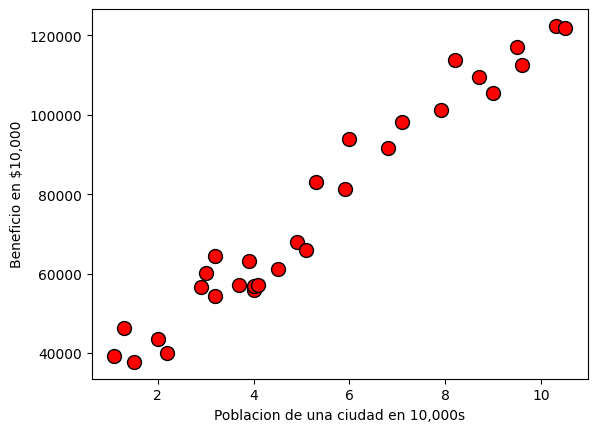

In [26]:
plotData(X, y)

In [27]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [28]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [29]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta)
    j = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [30]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 0.00
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 0.00
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [31]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [32]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 95
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 2347.9789, 12552.3190
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

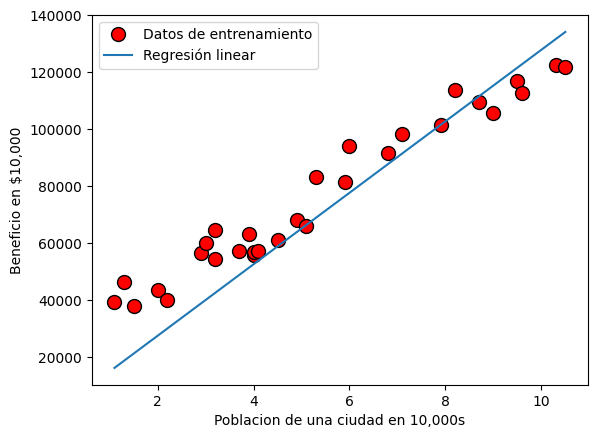

In [33]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [34]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 462810953.07

Para una población de = 70,000, se predice un beneficio de 1153188496.34



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

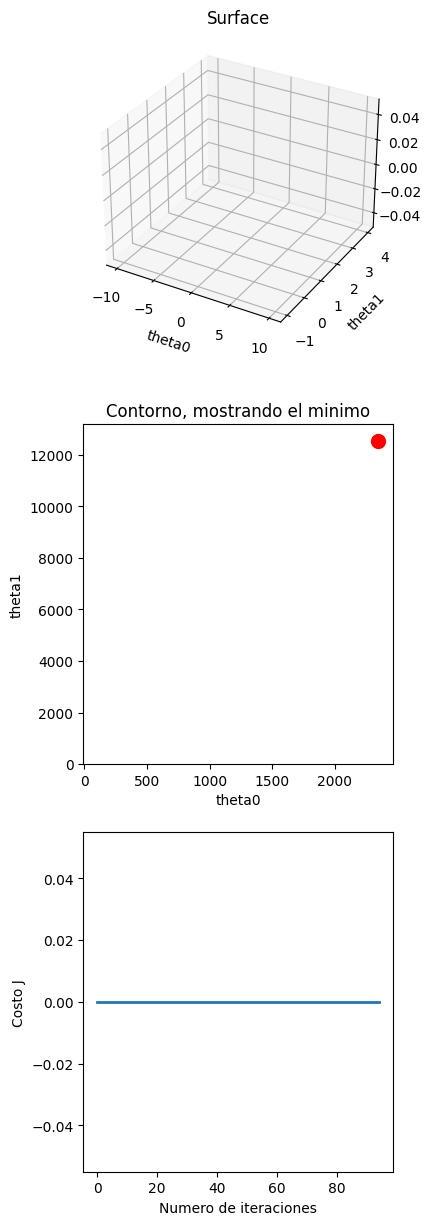

In [35]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass